<a href="https://colab.research.google.com/github/Ailianlian/liankanstudio/blob/master/liankan_py_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LianKanStudio Installation from Github.
you can comment %%capture to see the cell output

In [39]:
%%capture
!git clone https://github.com/Ailianlian/liankanstudio.git;

In [40]:
%%capture
%cd liankanstudio

In [41]:
%%capture
!pip install -r requirments.txt

In [42]:
# If you need restart after previous cell then execute, if not let the comment 
# %%capture
# %cd liankanstudio

In [43]:
%%capture
!python setup.py bdist_wheel

In [44]:
%%capture
!pip install dist/liankanstudio-0.4.2.2-py3-none-any.whl

In [45]:
# check you have torch cuda support. Enable it if you want (but there is really no reason to not do it.)
import torch
torch.cuda.is_available()

True

In [46]:
import liankanstudio as lks

In [47]:
from liankanstudio.util.yt_util import download, parse_url

In [48]:
# Takes a video, here is MISS DIOR – The new Eau de Parfum. Why not.
video_path, _ = download(parse_url("https://www.youtube.com/watch?v=h4s0llOpKrU"),'./temp_dl',"dior")

The directory is not present. Creating a new one..


In [49]:
# We can open a Capture.
capture = lks.Capture(video_path)

In [50]:
# Compute the scenes via a threshold method. This is used to know when we have to detect.
capture.find_scenes()

100%|██████████| 1125/1125 [00:03<00:00, 344.47frames/s]


Writing 1124 frames to CSV...


In [52]:
# Here we create a detector with keypoint rcnn with resnet 50 as backbone, the one from torchvision models.
# detector = lks.Detector(method="torchkrcnn", target="person")
# The target can be any classes of lks.detector.COCO_INSTANCE_CATEGORY_NAMES
# you can use method="ssd"
# With the method="yolo" you can download the weights and cfg from https://pjreddie.com/darknet/yolo/ , the default is tiny.
# detector = lks.Detector(method="yolo", target="person", proto_path="truc.cfg", weights="truc.weights", size=500, classes=PERSONNAL_CLASSES_LIST)
# detector = lks.Detector(method="yolo", target="person")
# For the method ssd we use a ssd with mobilenet backbone. You can also change the location of weights with caffemodel.
# To go fast
detector = lks.Detector(method="ssd", target="person")

/usr/local/lib/python3.6/dist-packages/liankanstudio/data/ssd/ssd_deploy.prototxt


In [53]:
cache = capture.compute_stat(detector, 10, video_path="./temp_dl/ssd_rt10.avi",threshold_detect=0.25,cache=True) # 10fps since cpu for ssd :(, use frcnn with gpu

  2%|▏         | 19/1125 [00:00<00:05, 184.88 frames /s]

./temp_dl/ssd_rt10.avi


100%|██████████| 1125/1125 [00:05<00:00, 200.34 frames /s]


In [75]:
# The purpose of cache is to help to do a warmup in the future.
# for example we can look cache[0]
# len(cache) =number of scene we have detected
# cache[0] is a dictionnary giving for each frame all the boxes detected, if there is a detection, the confidence, the labels and the tracking
# for example we can do the function
def get_alive_object_by_frame(scene_info):
  return [len(scene_info[frame_nb]["trackables"]) for frame_nb in scene_info]
def get_id_object_life(scene_info, obj_id):
  # return the presence or not of the object id
  return [obj_id in scene_info[frame_nb]["trackables"] for frame_nb in scene_info]


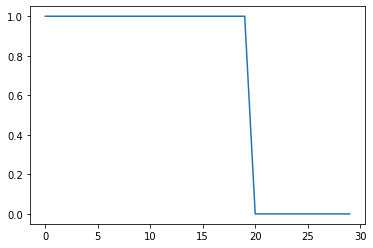

In [76]:
# in order to plot
import matplotlib.pyplot as plt
plt.plot(get_alive_object_by_frame(cache[0]));

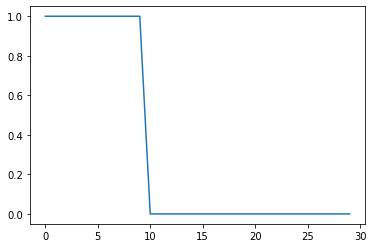

In [77]:
# We can also get the life of one tracked object
plt.plot(get_id_object_life(cache[0],0))

In [ ]:
# To go further we would need an identifier. But with this we already can try to detect the moment where we have few confidence in our number of boxes 
# and set a threshold by scene. This is what will come for 0.4.4.

In [38]:
# to reset the whole thing if a new version is available and notebook not updated.
#%%capture 
%cd ..
!rm -rf liankanstudio

/content
